# Heart Disease Prediction using ML algorithms

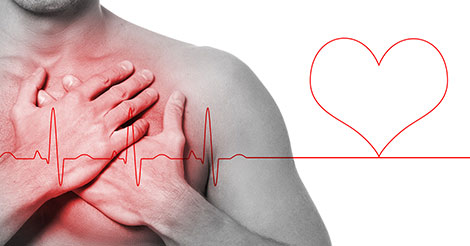

## Importing Important Libraries 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Data Understanding and Exploration

In [4]:
# Import the dataset
df = pd.read_csv('D:/ML_learning/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
# data description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### We dont have any null/missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

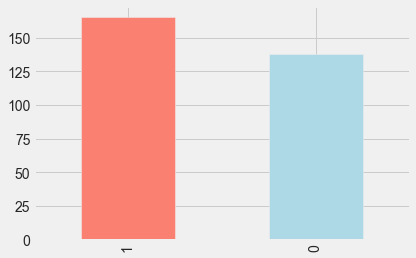

In [7]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

#### We have 165 people with heart disease and 138 people without heart disease, so dataset is not imbalanced data. its a classification problem.

In [11]:
# Understanding feature lebles in more details

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## EDA

In [13]:
# Storing Categorical and continous variables seprately for understanding each feature impact
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

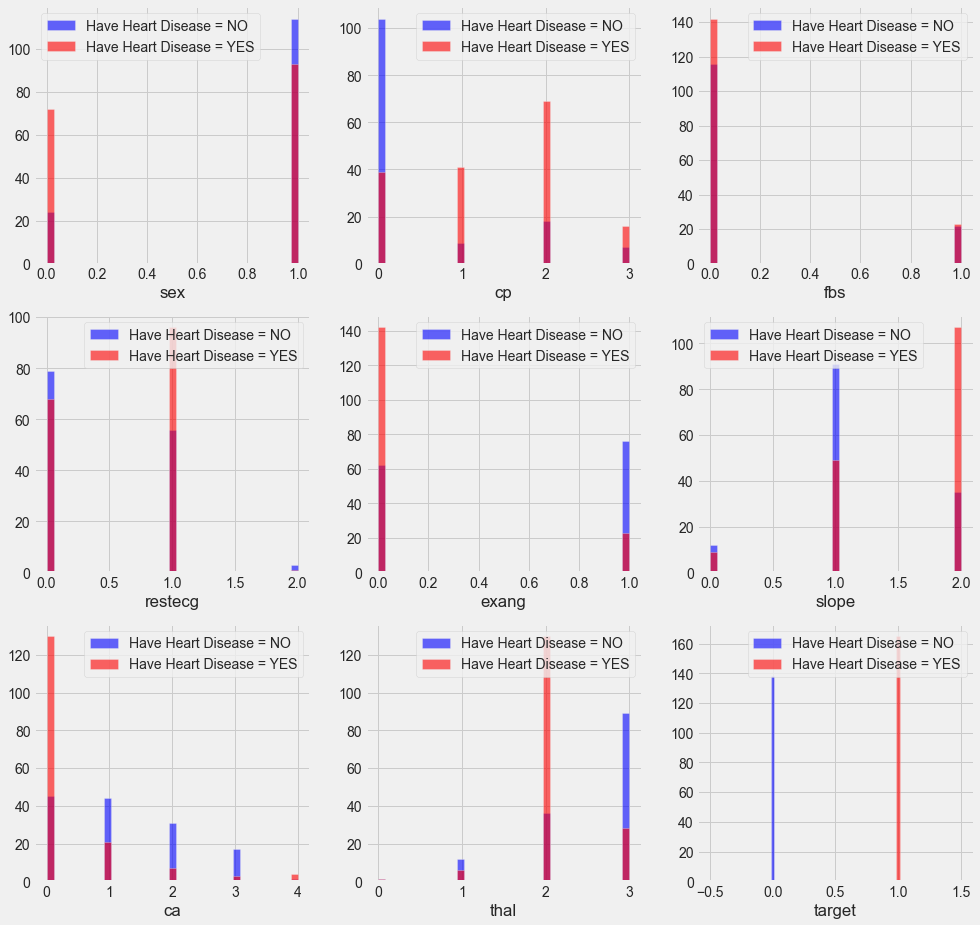

In [16]:
# Plot the categorical variables
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Observations from above plots

 1. We notice, that females are more likely to have heart problems than males.
 2. We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems compared 
       to 1, 2, 3 categories.
 3. We notice, that restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can          range from mild symptoms to severe problems) are more likely to have heart disease.
 4. People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems
 5. We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'
 6. ca=4 has astonishingly large number of heart patients
 7. thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more            likely to have heart disease.

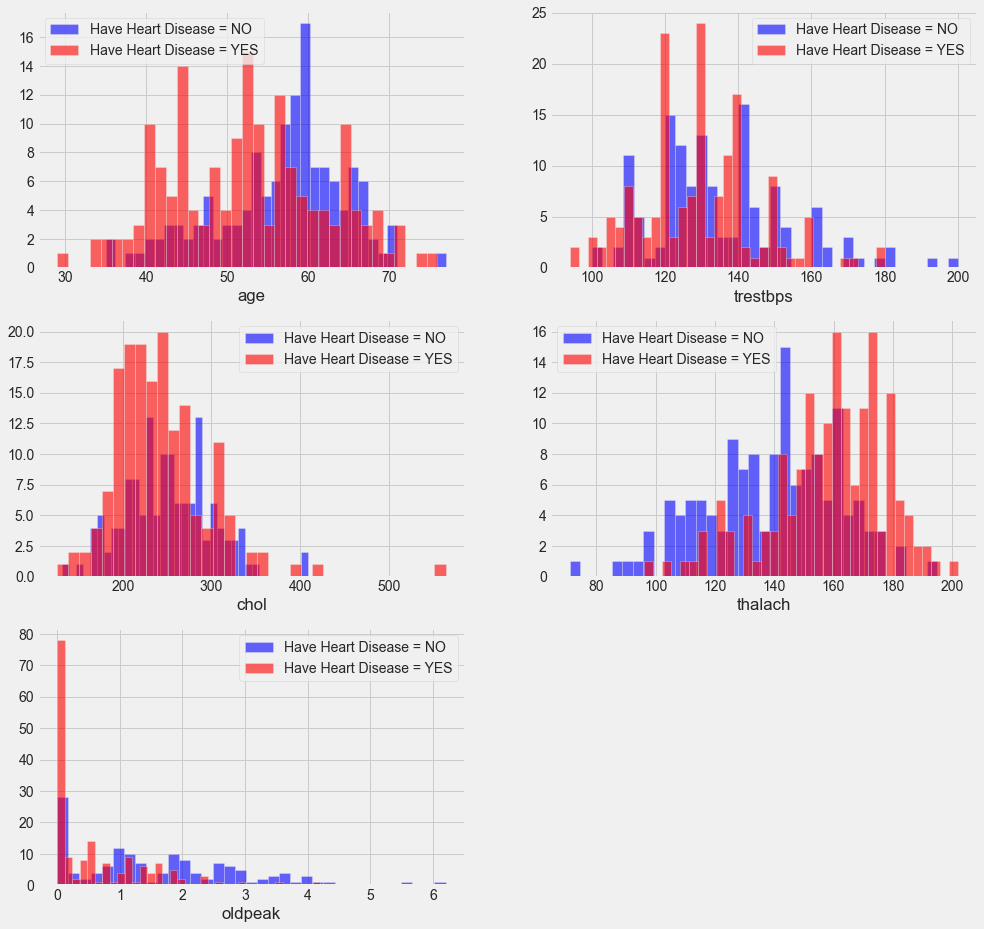

In [17]:
## Analyzing continous varibales

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Observations from above plots

1. Most of the features are following the Normal distribution
2. Blood pressure more than 120 is a concern and more likely to have heart disease
3. chol: people more than 180 chol value are more likely to have heart disease
4. thalach: more than 150 is a concern

#### Correlation between features

In [18]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


(14.5, -0.5)

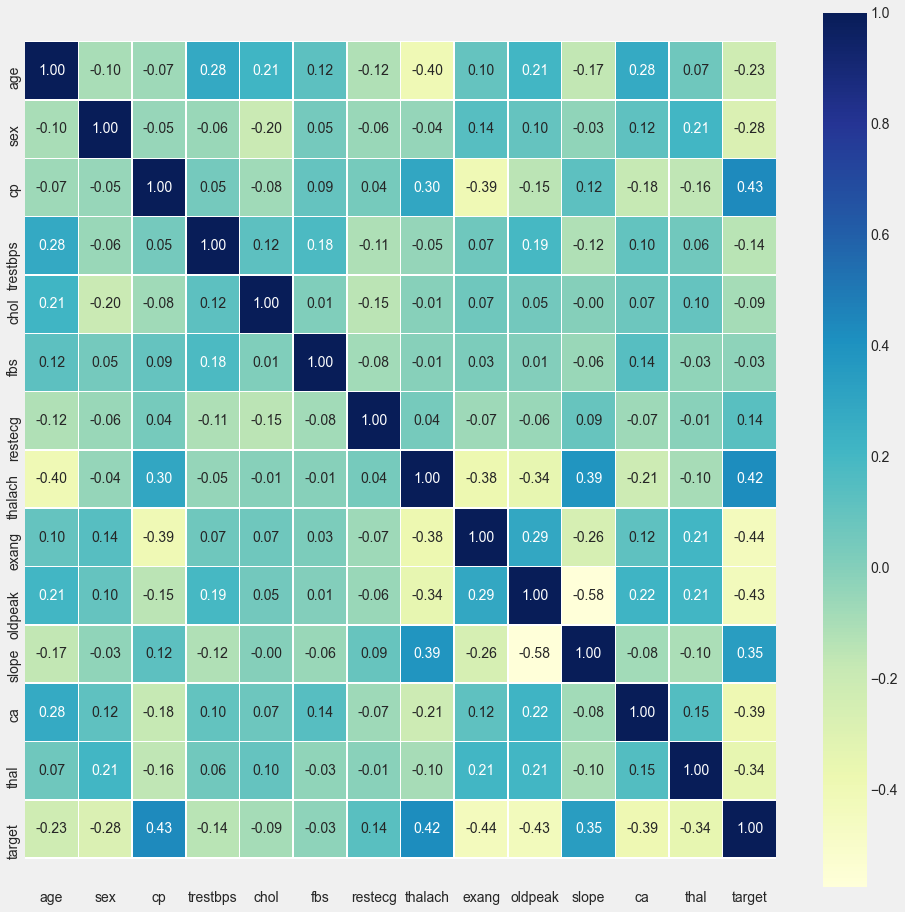

In [21]:
## lets visualize the correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

#### Observations:

1. chol and fbs are minimal correlated with target output
2. All the other columns are moderately correlated with target

## Data preprocessing 

In [22]:
## Handling categorical varibales

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)


## Scaling using standard scalar
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [35]:
## Training and Testing data
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Model fitting with different algorithms 

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

In [38]:
## Scoring parameters

score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
CM = confusion_matrix(Y_pred_lr, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_lr, y_test) # classification report 
print("The accuracy score using Logistic Regression is: "+str(score_lr)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using Logistic Regression is: 88.52 %
 
 confusion Matrix: 
 [[26  4]
 [ 3 28]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



#### We have observed the test accuracy using Logistic regression of 88.52% 

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [42]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)
CM = confusion_matrix(Y_pred_nb, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_nb, y_test) # classification report 
print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using Naive Bayes is: 49.18 %
 
 confusion Matrix: 
 [[27 29]
 [ 2  3]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.93      0.48      0.64        56
           1       0.09      0.60      0.16         5

    accuracy                           0.49        61
   macro avg       0.51      0.54      0.40        61
weighted avg       0.86      0.49      0.60        61



#### We have observed the accuracy of 49.18. We have high False positive values (Type 1 error)

### Support Vector Machine

In [43]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [45]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
CM = confusion_matrix(Y_pred_svm, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_svm, y_test) # classification report 
print("The accuracy score using Support Vector Machine is: "+str(score_svm)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using Support Vector Machine is: 86.89 %
 
 confusion Matrix: 
 [[26  5]
 [ 3 27]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### Here, we have observed the better accuracy than Naive Bayes i.e. 86.89%. BUT till now Logistic regression is best.

### K-nearest Neighbour (K-NN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [48]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
CM = confusion_matrix(Y_pred_knn, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_svm, y_test) # classification report 
print("The accuracy score using KNN is: "+str(score_knn)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using KNN is: 90.16 %
 
 confusion Matrix: 
 [[26  3]
 [ 3 29]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### KNN performed outstanding with the accuracy of 90.16 %

## Ensambled Techniques

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

## To find out the best feature of randomness of the estimator.
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

17


In [56]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)
CM = confusion_matrix(Y_pred_dt, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_dt, y_test) # classification report 
print("The accuracy score using Decision Tree is: "+str(score_dt)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using Decision Tree is: 88.52 %
 
 confusion Matrix: 
 [[26  4]
 [ 3 28]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



#### It performed equivelent to Logistic regression with the accuracy of 88.52%

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

## To find out the best feature of randomness of the estimator.

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

1221


In [59]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)
CM = confusion_matrix(Y_pred_rf, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_rf, y_test) # classification report 
print("The accuracy score using Random Forest is: "+str(score_rf)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using Random Forest is: 91.8 %
 
 confusion Matrix: 
 [[26  2]
 [ 3 30]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.94      0.91      0.92        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



#### This is the heighest Accuracy till now which is 91.8%

### XG boost

In [61]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[16:56:41] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\madhu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [62]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)
CM = confusion_matrix(Y_pred_xgb, y_test) # confusion matrix
classification_rep = classification_report(Y_pred_xgb, y_test) # classification report 
print("The accuracy score using XG boost is: "+str(score_xgb)+" %")
print(" \n confusion Matrix: \n", CM)
print(" \n The calssification report is \n", classification_rep)

The accuracy score using XG boost is: 83.61 %
 
 confusion Matrix: 
 [[26  7]
 [ 3 25]]
 
 The calssification report is 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#### The accuracy is 83.61%

## Output comparision 

In [63]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree",
              "Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %
The accuracy score achieved using Naive Bayes is: 49.18 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 90.16 %
The accuracy score achieved using Decision Tree is: 88.52 %
The accuracy score achieved using Random Forest is: 91.8 %
The accuracy score achieved using XGBoost is: 83.61 %


C:\Users\madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classification Algorithms', ylabel='Accuracy score'>

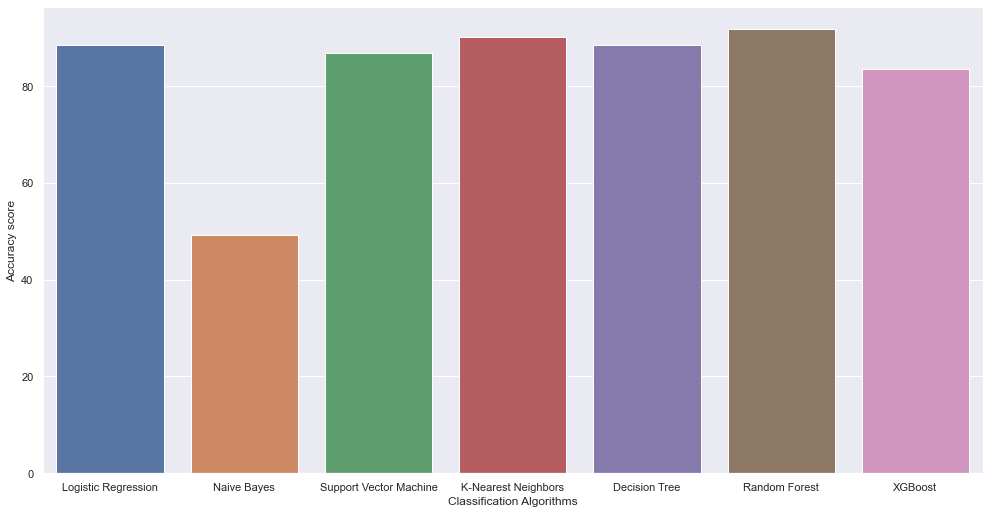

In [65]:
## Create a bar plot of accuracies

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Classification Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)